# Part I - (Prosper Loan Data Exploration)
## by (Paul Boadu Asamoah)

## Introduction
> Prosper is a peer-to-peer lending platform that connects borrowers with lenders. It allows borrowers to request loans up to `$40,000` and investors to invest as little as `$25` per loan. Prosper uses a proprietary algorithm to determine a credit rating for borrowers and assign interest rates to loans.

> The dataset provided includes information on loan listings on the Prosper platform between `2005` and `2014`. The dataset has `113,937 listings` and `81 columns`. Some of the important columns in the dataset include the loan amount, interest rate, borrower's credit score, employment status, income, and loan status.

> Other variables in the dataset, such as Prosper rating, estimated loss, estimated return, group affiliation, credit utilization, and credit inquiries, can be analyzed to learn more about the borrower's creditworthiness and borrowing habits. 

> I will investigate variables that affect the chance of default, spot trends in borrower creditworthiness and other related issuess.




## Preliminary Wrangling


In [84]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [85]:
# Load dataset into a pandas dataframe "df"
data = pd.read_csv("prosperLoanData.csv")

<h3>Assess Date</h3>

In [86]:
# Output the first five rows of the dataset
data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [87]:
# Check the shape of the dataset
data.shape

(113937, 81)

In [88]:
# Check the info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [89]:
# Check the missing values of each column
data.isna().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [90]:
# check the total missing values in the dataset
data.isna().sum().sum()

1364086

<h2> Data Wrangling</h2>

In [91]:
# Select the important variables
df = data.loc[:, ["Term", 
           "LoanStatus", 
           "BorrowerAPR", 
           "BorrowerRate", 
           "ProsperRating (Alpha)", 
           "ListingCategory (numeric)", 
           "BorrowerState", 
           "Occupation", 
           "EmploymentStatus", 
           "EmploymentStatusDuration", 
           "IsBorrowerHomeowner", 
           "CreditScoreRangeLower", 
           "CreditScoreRangeUpper", 
           "CurrentCreditLines", 
           "DebtToIncomeRatio", 
           "IncomeRange", 
           "StatedMonthlyIncome", 
           "LoanOriginalAmount", 
           "LoanOriginationDate", 
           "MonthlyLoanPayment"]]

In [92]:
# Output first five of the dataset
df.head()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating (Alpha),ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment
0,36,Completed,0.16516,0.1580,NaN,0,CO,Other,Self-employed,2.0,True,640.0,659.0,5.0,0.17,"$25,000-49,999",3083.333333,9425,2007-09-12 00:00:00,330.43
1,36,Current,0.12016,0.0920,A,2,CO,Professional,Employed,44.0,False,680.0,699.0,14.0,0.18,"$50,000-74,999",6125.000000,10000,2014-03-03 00:00:00,318.93
2,36,Completed,0.28269,0.2750,NaN,0,GA,Other,Not available,NaN,False,480.0,499.0,NaN,0.06,Not displayed,2083.333333,3001,2007-01-17 00:00:00,123.32
3,36,Current,0.12528,0.0974,A,16,GA,Skilled Labor,Employed,113.0,True,800.0,819.0,5.0,0.15,"$25,000-49,999",2875.000000,10000,2012-11-01 00:00:00,321.45
4,36,Current,0.24614,0.2085,D,2,MN,Executive,Employed,44.0,True,680.0,699.0,19.0,0.26,"$100,000+",9583.333333,15000,2013-09-20 00:00:00,563.97


In [93]:
# Check shape of new dataframe
df.shape

(113937, 20)

In [94]:
# Output the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Term                       113937 non-null  int64  
 1   LoanStatus                 113937 non-null  object 
 2   BorrowerAPR                113912 non-null  float64
 3   BorrowerRate               113937 non-null  float64
 4   ProsperRating (Alpha)      84853 non-null   object 
 5   ListingCategory (numeric)  113937 non-null  int64  
 6   BorrowerState              108422 non-null  object 
 7   Occupation                 110349 non-null  object 
 8   EmploymentStatus           111682 non-null  object 
 9   EmploymentStatusDuration   106312 non-null  float64
 10  IsBorrowerHomeowner        113937 non-null  bool   
 11  CreditScoreRangeLower      113346 non-null  float64
 12  CreditScoreRangeUpper      113346 non-null  float64
 13  CurrentCreditLines         10

- Rename `ProsperRating (Alpha)` and `ListingCategory (numeric)` column by move (Alpha) and (numeric) respectively.
- Change datatype of `LoanOriginationDate` from object to Pandas datetime.
- Change datatype of `Term`, `LoanStatus`, `ProsperRating (Alpha)`, `BorrowerState`, `IncomeRange`, `EmploymentStatus` categorical.
- Replace the values of `ListingCategory (numeric)` to its actual names and change the datatype to categorical.
- Drop all missing values.

<h3>Data Cleaning</h3>

Rename `ProsperRating (Alpha)` and `ListingCategory (numeric)` columns by striping the _(Alpha)_ and _(numeric)_ from each column name respectively. 

In [95]:
# Rename ProsperRating (Alpha) and ListingCategory (numeric) columns using Pandas rename function
df.rename(columns = {"ProsperRating (Alpha)" : "ProsperRating", 
                     "ListingCategory (numeric)" : "ListingCategory"},
          inplace = True)
        
# Check column names
df.columns

Index(['Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'ProsperRating',
       'ListingCategory', 'BorrowerState', 'Occupation', 'EmploymentStatus',
       'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'CurrentCreditLines',
       'DebtToIncomeRatio', 'IncomeRange', 'StatedMonthlyIncome',
       'LoanOriginalAmount', 'LoanOriginationDate', 'MonthlyLoanPayment'],
      dtype='object')

Change the datatype of `LoanOriginationDate` column from object to Pandas datetime

In [96]:
# Change datatype of "LoanOriginationDate" to datetime
df.LoanOriginationDate = pd.to_datetime(df["LoanOriginationDate"])

Change datatype of `Term`, `LoanStatus`, `ProsperRating`, `BorrowerState`, `IncomeRange`, `EmploymentStatus` from int or object to categorical using `.astype()`

In [97]:
# Asign the columns into a single list
col = ["Term", 
       "LoanStatus", 
       "ProsperRating", 
       "BorrowerState", 
       "IncomeRange", 
       "EmploymentStatus"]

# Define a function to change the datatype of the columns to categorical
def change_dtype(df, col):
    """Take df as dataframe and col as column and changes the 
    datatype of the column to categorical datatype"""
    for item in col:
        df[item] = df[item].astype("category")
        
# Call the function
change_dtype(df, col)

In [98]:
# Output the dtype of the columns
df[col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Term              113937 non-null  category
 1   LoanStatus        113937 non-null  category
 2   ProsperRating     84853 non-null   category
 3   BorrowerState     108422 non-null  category
 4   IncomeRange       113937 non-null  category
 5   EmploymentStatus  111682 non-null  category
dtypes: category(6)
memory usage: 671.8 KB


Replace the numerical values of `ListingCategory` to its actual names and change the datatype to categorical using Pandas `.replace()` and `.astype()`.

In [99]:
# Replace the values from 0 - 20 its actual listing 
df.ListingCategory.replace({0 : "Not Available", 
                            1 : "Debt Consolidation", 
                            2 : "Home Improvement", 
                            3 : "Business", 
                            4 : "Personal Loan", 
                            5 : "Student Use", 
                            6 : "Auto", 
                            7: "Other", 
                            8 : "Baby&Adoption", 
                            9 : "Boat", 
                            10 : "Cosmetic Procedure", 
                            11 : "Engagement Ring", 
                            12 : "Green Loans", 
                            13 : "Household Expenses", 
                            14 : "Large Purchases", 
                            15 : "Medical/Dental", 
                            16 : "Motorcycle", 
                            17 : "RV", 
                            18 : "Taxes", 
                            19 : "Vacation", 
                            20 : "Wedding Loans"},
                          inplace = True)

# Change the dtype from object to categorical using .astype()
df.ListingCategory = df.ListingCategory.astype("category")

In [100]:
# Print the datatype and 5 sample of ListingCategory column
print(f"The datatype is {df.ListingCategory.dtype} \n")
print(df.ListingCategory.sample(5))

The datatype is category 

12342      Home Improvement
17107                 Other
18747    Household Expenses
20211    Debt Consolidation
51088              Vacation
Name: ListingCategory, dtype: category
Categories (21, object): ['Auto', 'Baby&Adoption', 'Boat', 'Business', ..., 'Student Use', 'Taxes', 'Vacation', 'Wedding Loans']


Drop all missing values in the dataset.

In [101]:
# Drop missing values aclose rows 
df.dropna(axis = 0, inplace = True)

In [102]:
# Check missing values in the dataset
df.isna().sum()

Term                        0
LoanStatus                  0
BorrowerAPR                 0
BorrowerRate                0
ProsperRating               0
ListingCategory             0
BorrowerState               0
Occupation                  0
EmploymentStatus            0
EmploymentStatusDuration    0
IsBorrowerHomeowner         0
CreditScoreRangeLower       0
CreditScoreRangeUpper       0
CurrentCreditLines          0
DebtToIncomeRatio           0
IncomeRange                 0
StatedMonthlyIncome         0
LoanOriginalAmount          0
LoanOriginationDate         0
MonthlyLoanPayment          0
dtype: int64

In [103]:
# Output info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76216 entries, 1 to 113936
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Term                      76216 non-null  category      
 1   LoanStatus                76216 non-null  category      
 2   BorrowerAPR               76216 non-null  float64       
 3   BorrowerRate              76216 non-null  float64       
 4   ProsperRating             76216 non-null  category      
 5   ListingCategory           76216 non-null  category      
 6   BorrowerState             76216 non-null  category      
 7   Occupation                76216 non-null  object        
 8   EmploymentStatus          76216 non-null  category      
 9   EmploymentStatusDuration  76216 non-null  float64       
 10  IsBorrowerHomeowner       76216 non-null  bool          
 11  CreditScoreRangeLower     76216 non-null  float64       
 12  CreditScoreRangeU

### What is the structure of your dataset?

> The dataset contains information on 76,216 borrowers and 20 distinct features. These features include borrower-related information such as term, loan status, borrower APR, borrower rate, Prosper rating, listing category, borrower state, occupation, employment status, employment status duration, and whether the borrower owns a home. 

> Additionally, the dataset includes data on credit scores, current credit lines, debt-to-income ratio, income range, stated monthly income, loan original amount, loan origination date, and monthly loan payment.

> Of the 20 features, 10 are numerical, 7 are categorical, and 1 is boolean. Furthermore, the dataset also includes data types such as datetime and object.


### What is/are the main feature(s) of interest in your dataset?

> To explore the factors and patterns in the creditworthiness of borrowers and the borrowing trend of Prosper Loan Business.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Base on the interest want to generate from the dataset the following features will be of greate support,
> - Term
> - Borrowing APR
> - Loan Original Amount
> - Employment Status
> - Year of Loan Payment

## Univariate Exploration


I will begin by plotting the distribution of borrowers Loan Status

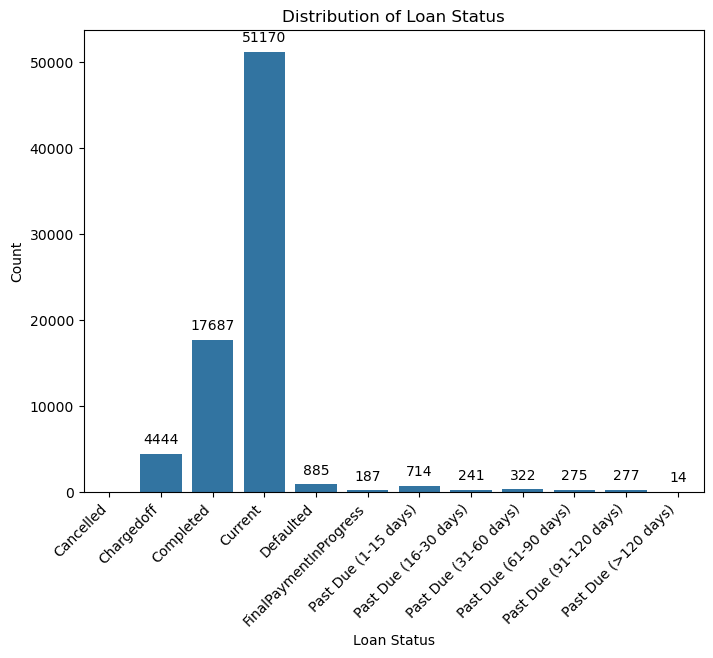

In [104]:
## Show the distribution of LoanStatus using seaborn
# Order values
freq = df.LoanStatus.value_counts().index

# Set basecolor
basecolor = sns.color_palette()[0]

# set figure ize
plt.figure(figsize = (8,6))

# Plot countplot
ax = sns.countplot(x = "LoanStatus", 
              data = df, 
              color = basecolor)

# Set annotation
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', 
                va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

# Label the plot
plt.xticks(rotation = 45, ha = "right")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.title("Distribution of Loan Status")

# show plot
plt.show()

According to the loan status distribution, it can be inferred that a significant number of borrowers, accounting for 67%, are currently servicing their loans, while 23% have completed payments. A small percentage of the populace, though, has defaulted on their payments and others are past due. Notably, none of the borrowers have cancelled their loan.

Lets take a look at the distribution of BorrowerAPR to understand the relationship variable whether it is associated with the laon status.

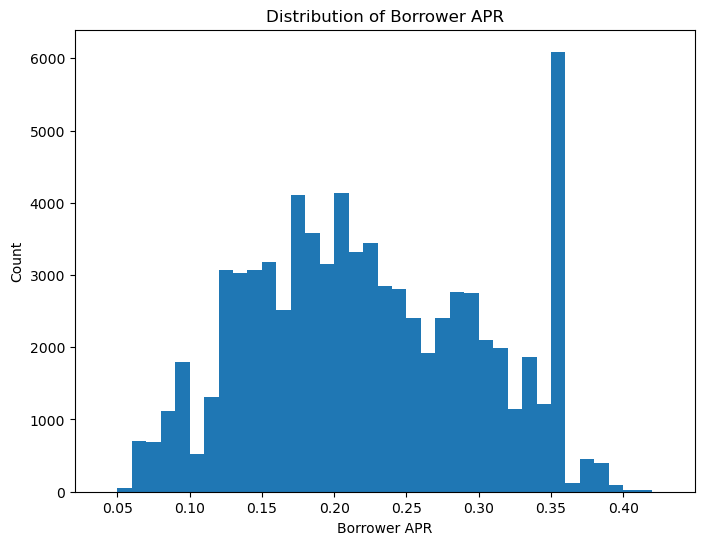

In [105]:
# Show the distribution of Borrowers APR using matplotlib
# Set bins
bins = np.arange(0.04, df["BorrowerAPR"].max() + 0.01, 0.01)

# Set figure size
plt.figure(figsize = (8,6))

# plot histogram 
plt.hist(x = "BorrowerAPR", 
         data = df, 
         bins = bins, 
         color = basecolor)

# Label the plot
plt.xlabel("Borrower APR")
plt.ylabel("Count")
plt.title("Distribution of Borrower APR")

# Show plot
plt.show()

According to the distribution, it appears that the Borrowers APR has a higher frequency between 0.10 to 0.25 and at 0.35. However, there are relatively fewer distributions beyond 0.35 to 0.40 and below 0.10.

Now, let's find out the most common term for loans

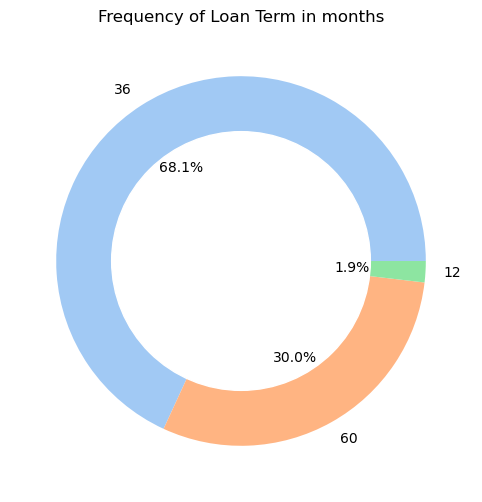

In [106]:
# Distribut the loan term
# Set colors
colors = sns.color_palette("pastel")

# Set the figure size
plt.figure(figsize = (8,6))

# Plot the figure
plt.pie(df["Term"].value_counts(),
        labels = df["Term"].value_counts().index, 
        autopct = "%1.1f%%", 
        colors = colors)

# Removing the center part of the pie graph
circle = plt.Circle( (0,0), 0.7, color = "white")

p = plt.gcf() #get figure
p.gca().add_artist(circle)  #grab
plt.title("Frequency of Loan Term in months")

# Show plot
plt.show()

The chart depicts the various repayment terms in months for borrowers. A majority of the borrowers (68.1%) have a repayment term of 36 months, equivalent to 3 years. Another significant portion (30.0%) has a loan term of 60 months, which represents a 5-year repayment period. The remaining 1.9% have a term of 12 months, which is a 1-year repayment period.

What is the distribution of monthly loan payments among borrowers?

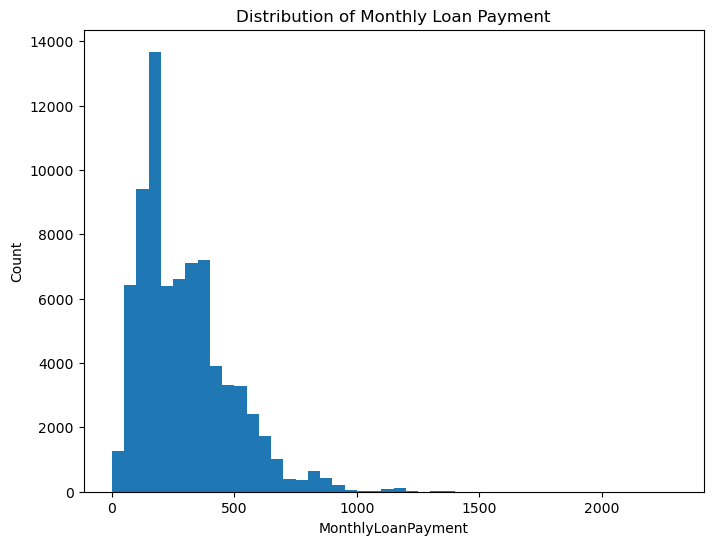

In [107]:
# Plot a histogram to show the distribution of Loan Original Amount
# set the bins 
bins = np.arange(0, df.MonthlyLoanPayment.max() + 50, 50)

# Set the figure size
plt.figure(figsize = (8,6))

# Plot the hsitogram
plt.hist(data = df, 
         x = "MonthlyLoanPayment", 
         bins = bins)

# Label the plot
plt.xlabel("MonthlyLoanPayment")
plt.ylabel("Count")
plt.title("Distribution of Monthly Loan Payment")

# Show plot
plt.show()

According to the chart, a significant portion of the population makes monthly payments between 50 and 500, with only a few borrowers making payments between 550 and 1500. This suggests that the distribution of monthly loan payments is skewed to the left.

What is the distribution of Income Range of the borrowers

In [108]:
## Income range order (list)
income_range_order = ["Not employed", 
                      "$0", 
                      "$1-24,999", 
                      "$25,000-49,999", 
                      "$50,000-74,999", 
                      "$75,000-99,999", 
                      "$100,000+", 
                      "Not displayed"]

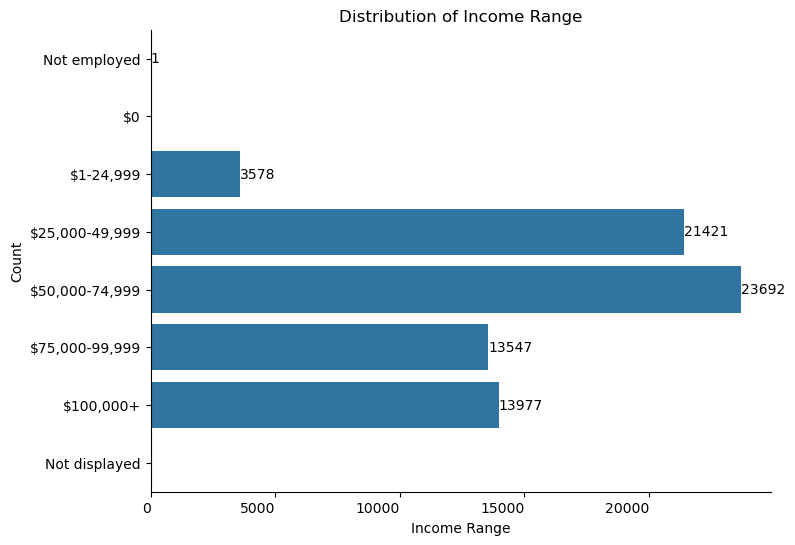

In [109]:
## Show the distribution of income Range
# Order values
freq = df.IncomeRange.value_counts().index

# Set basecolor
basecolor = sns.color_palette()[0]

# set figure ize
plt.figure(figsize = (8,6))

# Plot countplot
ax = sns.countplot(y = "IncomeRange", 
                   data = df, 
                   color = basecolor, 
                   order = income_range_order)

# Set annotation
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width > 0:
        ax.annotate(f"{width:0.0f}", 
                    xy = (left + width, bottom + height), 
                    xytext=(left + width + 2, bottom + height/2),
                    ha = "left", 
                    va = "center",
                    fontsize = 10)          
              
# Label the plot
plt.xticks(ha = "right")
plt.xlabel("Income Range")
plt.ylabel("Count")
plt.title("Distribution of Income Range")
sns.despine()

# show plot
plt.show()

Based on the chart, it can be observed that the majority of borrowers' income falls within the range of 50,000 - 74,999, followed by the range of 25,000 - 49,999. It is notable that a total of 3,578 individuals earn an income within the 1 - 24,999 range. Moreover, the graph shows that only one person in the population is unemployed, while none of the borrowers have a reported income of 0 or have not disclosed their income.

What is the distribution of ListingCategory

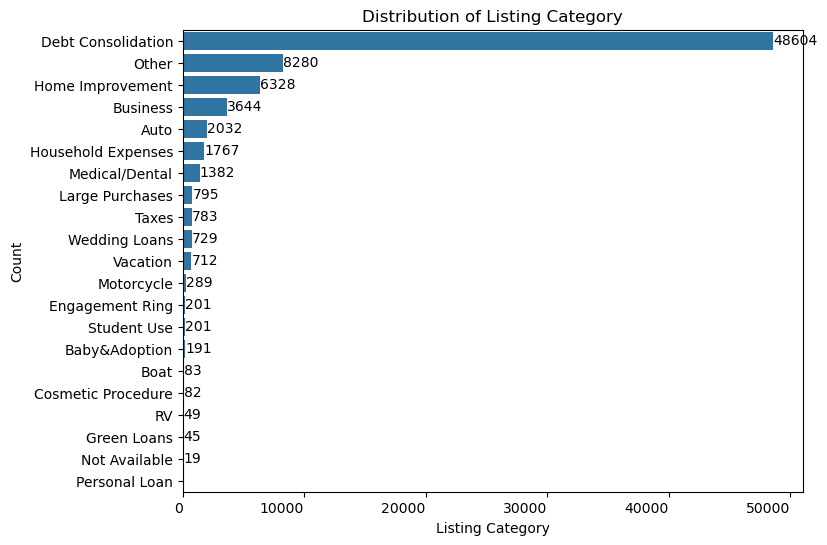

In [110]:
## Show the distribution of ListingCategory
# Order values
freq = df.ListingCategory.value_counts().index

# Set basecolor
base_color = sns.color_palette()[0]

# set figure ize
plt.figure(figsize = (8,6))

# Plot countplot
ax = sns.countplot(y = "ListingCategory", 
              data = df, 
              color = base_color,
              order = freq)

# Set annotation
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width > 0:
        ax.annotate(f"{width:0.0f}", 
                    xy = (left + width, bottom + height), 
                    xytext=(left + width + 2, bottom + height/2),
                    ha = "left", 
                    va = "center",
                    fontsize = 10)          
              
# Label the plot
plt.xticks(ha = "right")
plt.xlabel("Listing Category")
plt.ylabel("Count")
plt.title("Distribution of Listing Category")

# show plot
plt.show()

Based on the distribution, it is evident that the majority of the listed is related to debt consolidation, with the remaining being allocated across various categories such as home improvement, business, auto, household expenses, and other related activities. Notably, there were no listings recorded for personal loans.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The Loan Status inferred that a significant number of 51,170 borrowers, accounting for 67%, are currently servicing their loans, while 17,687 representing 23% have completed payments. Notably, none of the borrowers have cancelled their loan. Also it was observed that the majority of borrowers' income falls within the range of 50,000 - 74,999 while one person indicated as unemployed whereas none of the borrower earn an income of 0.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> By carefully selecting the variables and applying effective data wrangling techniques, the variuos variables generate insightful understanding from the data.

## Bivariate Exploration


 Starting with the relationship between ProsperRating and BorrowerAPR

In [111]:
# Credit rating in order
credit_rating = ["AA", "A", "B", "C", "D", "E", "HR"]

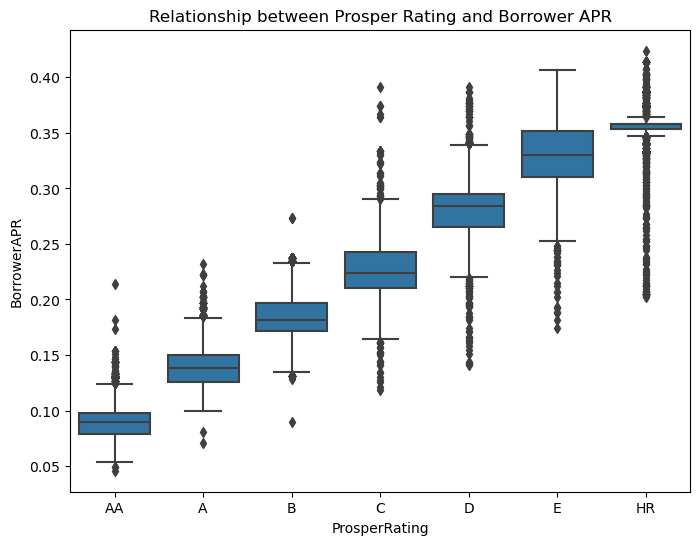

In [112]:
# Set the figure size
plt.figure(figsize = [8, 6])

# Create a box plot
sns.boxplot(data = df, 
            x = "ProsperRating", 
            y = "BorrowerAPR", 
            color = base_color,
            order = credit_rating)

# set the title of the plot
plt.title('Relationship between Prosper Rating and Borrower APR')

# display the plot
plt.show()

The box plot depicts the ProsperRating distribution across BorrowerAPR. It also emphasises the presence of outliers in various distributions. AA has the lowest Borrowing APR among the ratings, with an IQR of 0.03 and a median of 0.09, and an upper whisker bound of 0.145. Conversely, Prosper Ratings A, B, C, D, E, and HR have higher Borrowing APR in that order. While the HR rating has the highest Borrowing APR, it also has significantly more extreme values than the other ratings.

What is the distribution of ProsperRating vs IsBorrowerHomeowner?


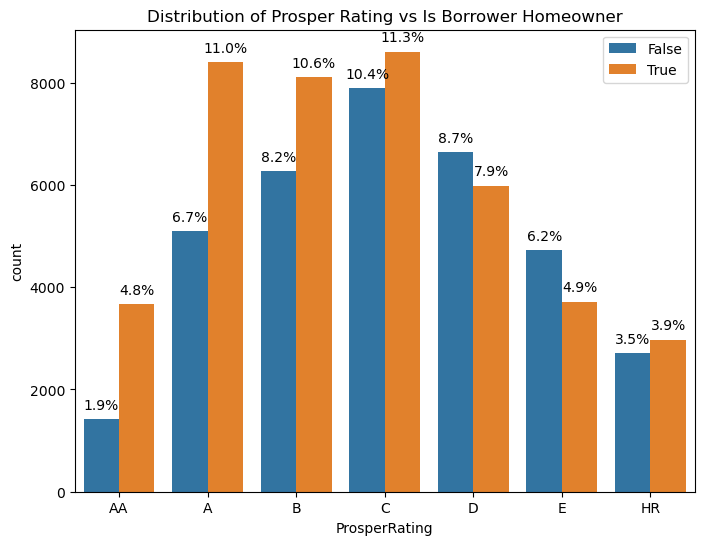

In [113]:
# Set the figure size
plt.figure(figsize = (8, 6))

# Create a count plot
ax = sns.countplot(data = df,
                   order = credit_rating, 
                   x = "ProsperRating", 
                   hue = "IsBorrowerHomeowner")

# Calculate total value of bar chart
total = sum([p.get_height() for p in ax.patches])

# Set annotation as percentage
for p in ax.patches:
    percentage = 100 * p.get_height() / total
    ax.annotate(f"{percentage:.1f}%",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = "center",
                va = "center",
                xytext = (0, 10),
                textcoords = "offset points")
    
# set the title and legend of the plot
plt.title("Distribution of Prosper Rating vs Is Borrower Homeowner")
plt.legend()

# Display plot
plt.show()


According to the distribution of ProsperRating and IsBorrowerHomeowner, borrowers who were rated C, has 11.3% of them being home owners and 10.4% not. Furthermore, those rated A account for 6.7% not owning a home and the remaining 11.0% owning one. Furthermore, only a small percentage of the population is rated AA, with 4.8% of them owning a home and 1.9% not. This distribution informs me to conduct additional research into the IsBorrowerHomeowner.

Let's understand the relationship between ProsperRating and LoanOriginalAmount

<Figure size 800x600 with 0 Axes>

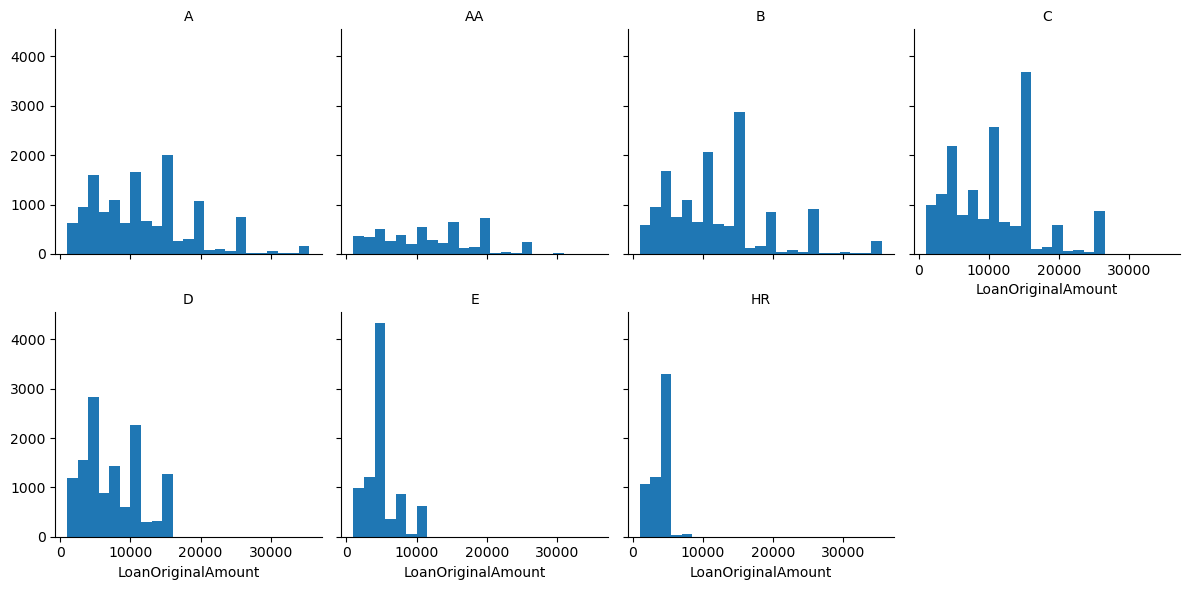

In [114]:
# Set figure size
plt.figure(figsize = (8, 6))

# Set dynamic bin edges
bin_edges = np.arange(1000, df.LoanOriginalAmount.max()+1500, 1500)

# Create a FacetGrid
g = sns.FacetGrid(data = df, 
                  col = "ProsperRating",
                  col_wrap = 4)
# Map plot
g.map(plt.hist, 
      "LoanOriginalAmount",
      bins = bin_edges)

# Set each figure titel short
g.set_titles("{col_name}")

# Display plot
plt.show()

The relationship between prosper rating A and loan original amount indicates that most loans fall within the range of 1000 to 20,000, although some loans exceed 20,000 and extend to 45,000. Borrowers with an AA rating have a range of 1000 to 20,000, while the majority of those with a B rating have a loan amount between 1000 and 15,000. Prosper Rating C has the highest distribution of loans between 1000 to 15,000, with some extending beyond 15,000 to 25,000. In comparison, Rating D has a distribution between 1000 to 15,000, and Rating E ranges between 1000 to 10,000. Finally, HR rating has the majority of its distribution within 1000 to 5000, with a few loans exceeding 5000. 

Let's look at the MonthlyLoanPayment trend over LoanOriginationDate. 

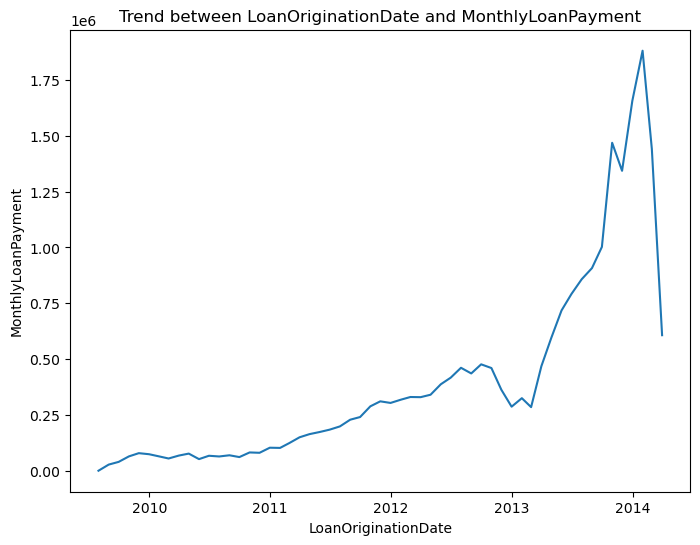

In [115]:
# Set the figure size
plt.figure(figsize = (8,6))

# Resample the dataframe by month and sum the values
df_monthly = df.resample("M", on = "LoanOriginationDate").sum()

# Create a line plot
sns.lineplot(data = df_monthly, 
             x = "LoanOriginationDate", 
             y = "MonthlyLoanPayment")

# set the title of the plot
plt.title('Trend between LoanOriginationDate and MonthlyLoanPayment')

# display the plot
plt.show()

The trend of monthly loan payments over the loan origination date shows that payments increased from June 2019 to late 2012. However, from late 2012 to early 2013, monthly payments fell from 50,000 to 25,000. Following this drop, payments increased sharply from 25,000 to 180,000 between 2013 and 2014, followed by another drop.

Checking the correlation between all numberical variables

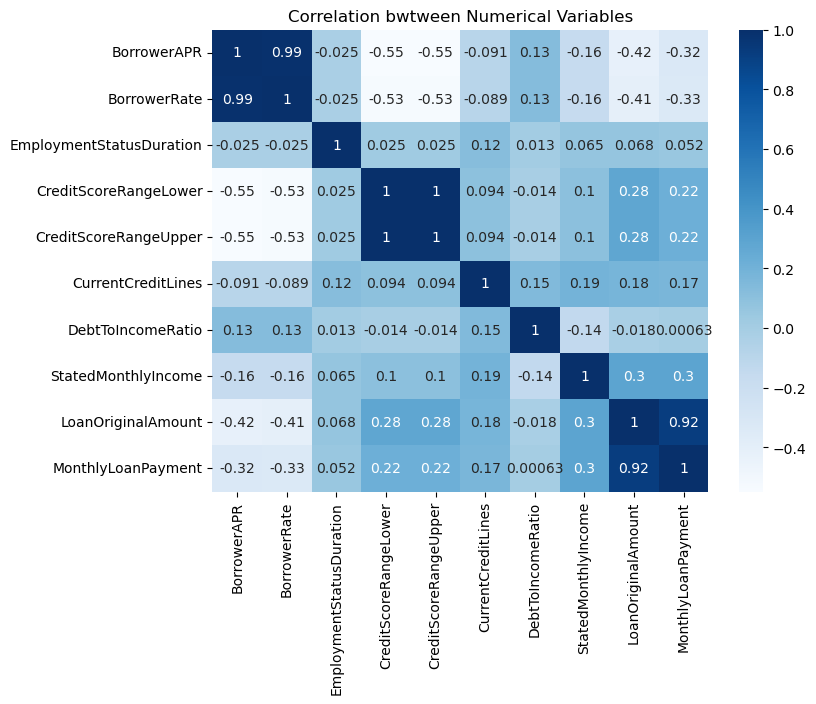

In [116]:
# Select all numberical variables
numeric = df.select_dtypes(include = np.number)

# Calculate the correlation
corr = numeric.corr()

# Set figure size
plt.figure(figsize = (8, 6))

# Create heatmap
sns.heatmap(corr, annot=True, cmap = "Blues")
plt.title("Correlation bwtween Numerical Variables") #Set titel of the chart

# display plot
plt.show()

The heat map shows that the majority of the numerical variables have little or no correlation with one another, while a few have a negative correlation. However, there is a 0.92 correlation between MonthlyLoanPayment and LoanOriginalAmount. Furthermore, Borrowing APR and Borrowing Rate have a high correlation of 0.99, while CreditScoreRange Lower and Upper have a perfect correlation of 1, indicating that these variables are very similar. Additional analysis is required to gain more insights and comprehend borrowers' borrowing trends and creditworthiness patterns.

Cheching the correlation between MonthlyLoanPayment and LoanOriginalAmount

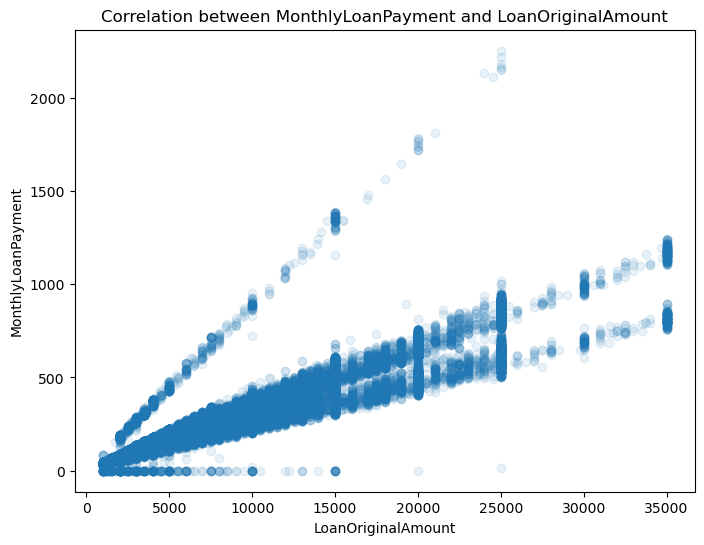

In [117]:
# Set figure size
plt.figure(figsize = (8,6))

# Create plot
sns.regplot(data = df, 
            y = "MonthlyLoanPayment", 
            x = "LoanOriginalAmount", 
            x_jitter=0.04, 
            scatter_kws={'alpha':1/10}, 
            fit_reg=False)

# set the title of the plot
plt.title("Correlation between MonthlyLoanPayment and LoanOriginalAmount")

# display plot
plt.show()

The scatter plot shows a strong positive correlation between MonthlyLoanPayment and LoanOriginalAmount. Furthermore, the majority of the population are the borrowers who make monthly loan payments ranging from 0 to 900 have loan amounts ranging from 1000 to 25000.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> - The monthly loan payment trend shows an increase from June 2019 to late 2012, a decrease from late 2012 to early 2013, a sharp increase between 2013 and 2014, and another drop.

> - According to the ProsperRating and IsBorrowerHomeowner distributions, a sizable proportion of borrowers are rated C, with a relatively even split between those who own a home and those who do not. Borrowers with an A credit score are more common, with a higher percentage owning a home. Borrowers with an AA credit rating are relatively uncommon, and the majority own a home. This information suggests that more research into IsBorrowerHomeowner is necessary.

> - According to the scatter plot analysis, there is a strong positive correlation between MonthlyLoanPayment and LoanOriginalAmount. The majority of borrowers make monthly payments of up to 900 and have loan amounts ranging from 100 to 25000.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The relationship between Prosper Rating and IsBorrowerHomeowner has prompted a closer look at the relationship between Prosper Rating and LoanOriginalAmount. The goal is to find a discernible pattern in the loan amounts most commonly granted to homeowners based on their credit score.

## Multivariate Exploration


Matrix distribution of the numerical variables

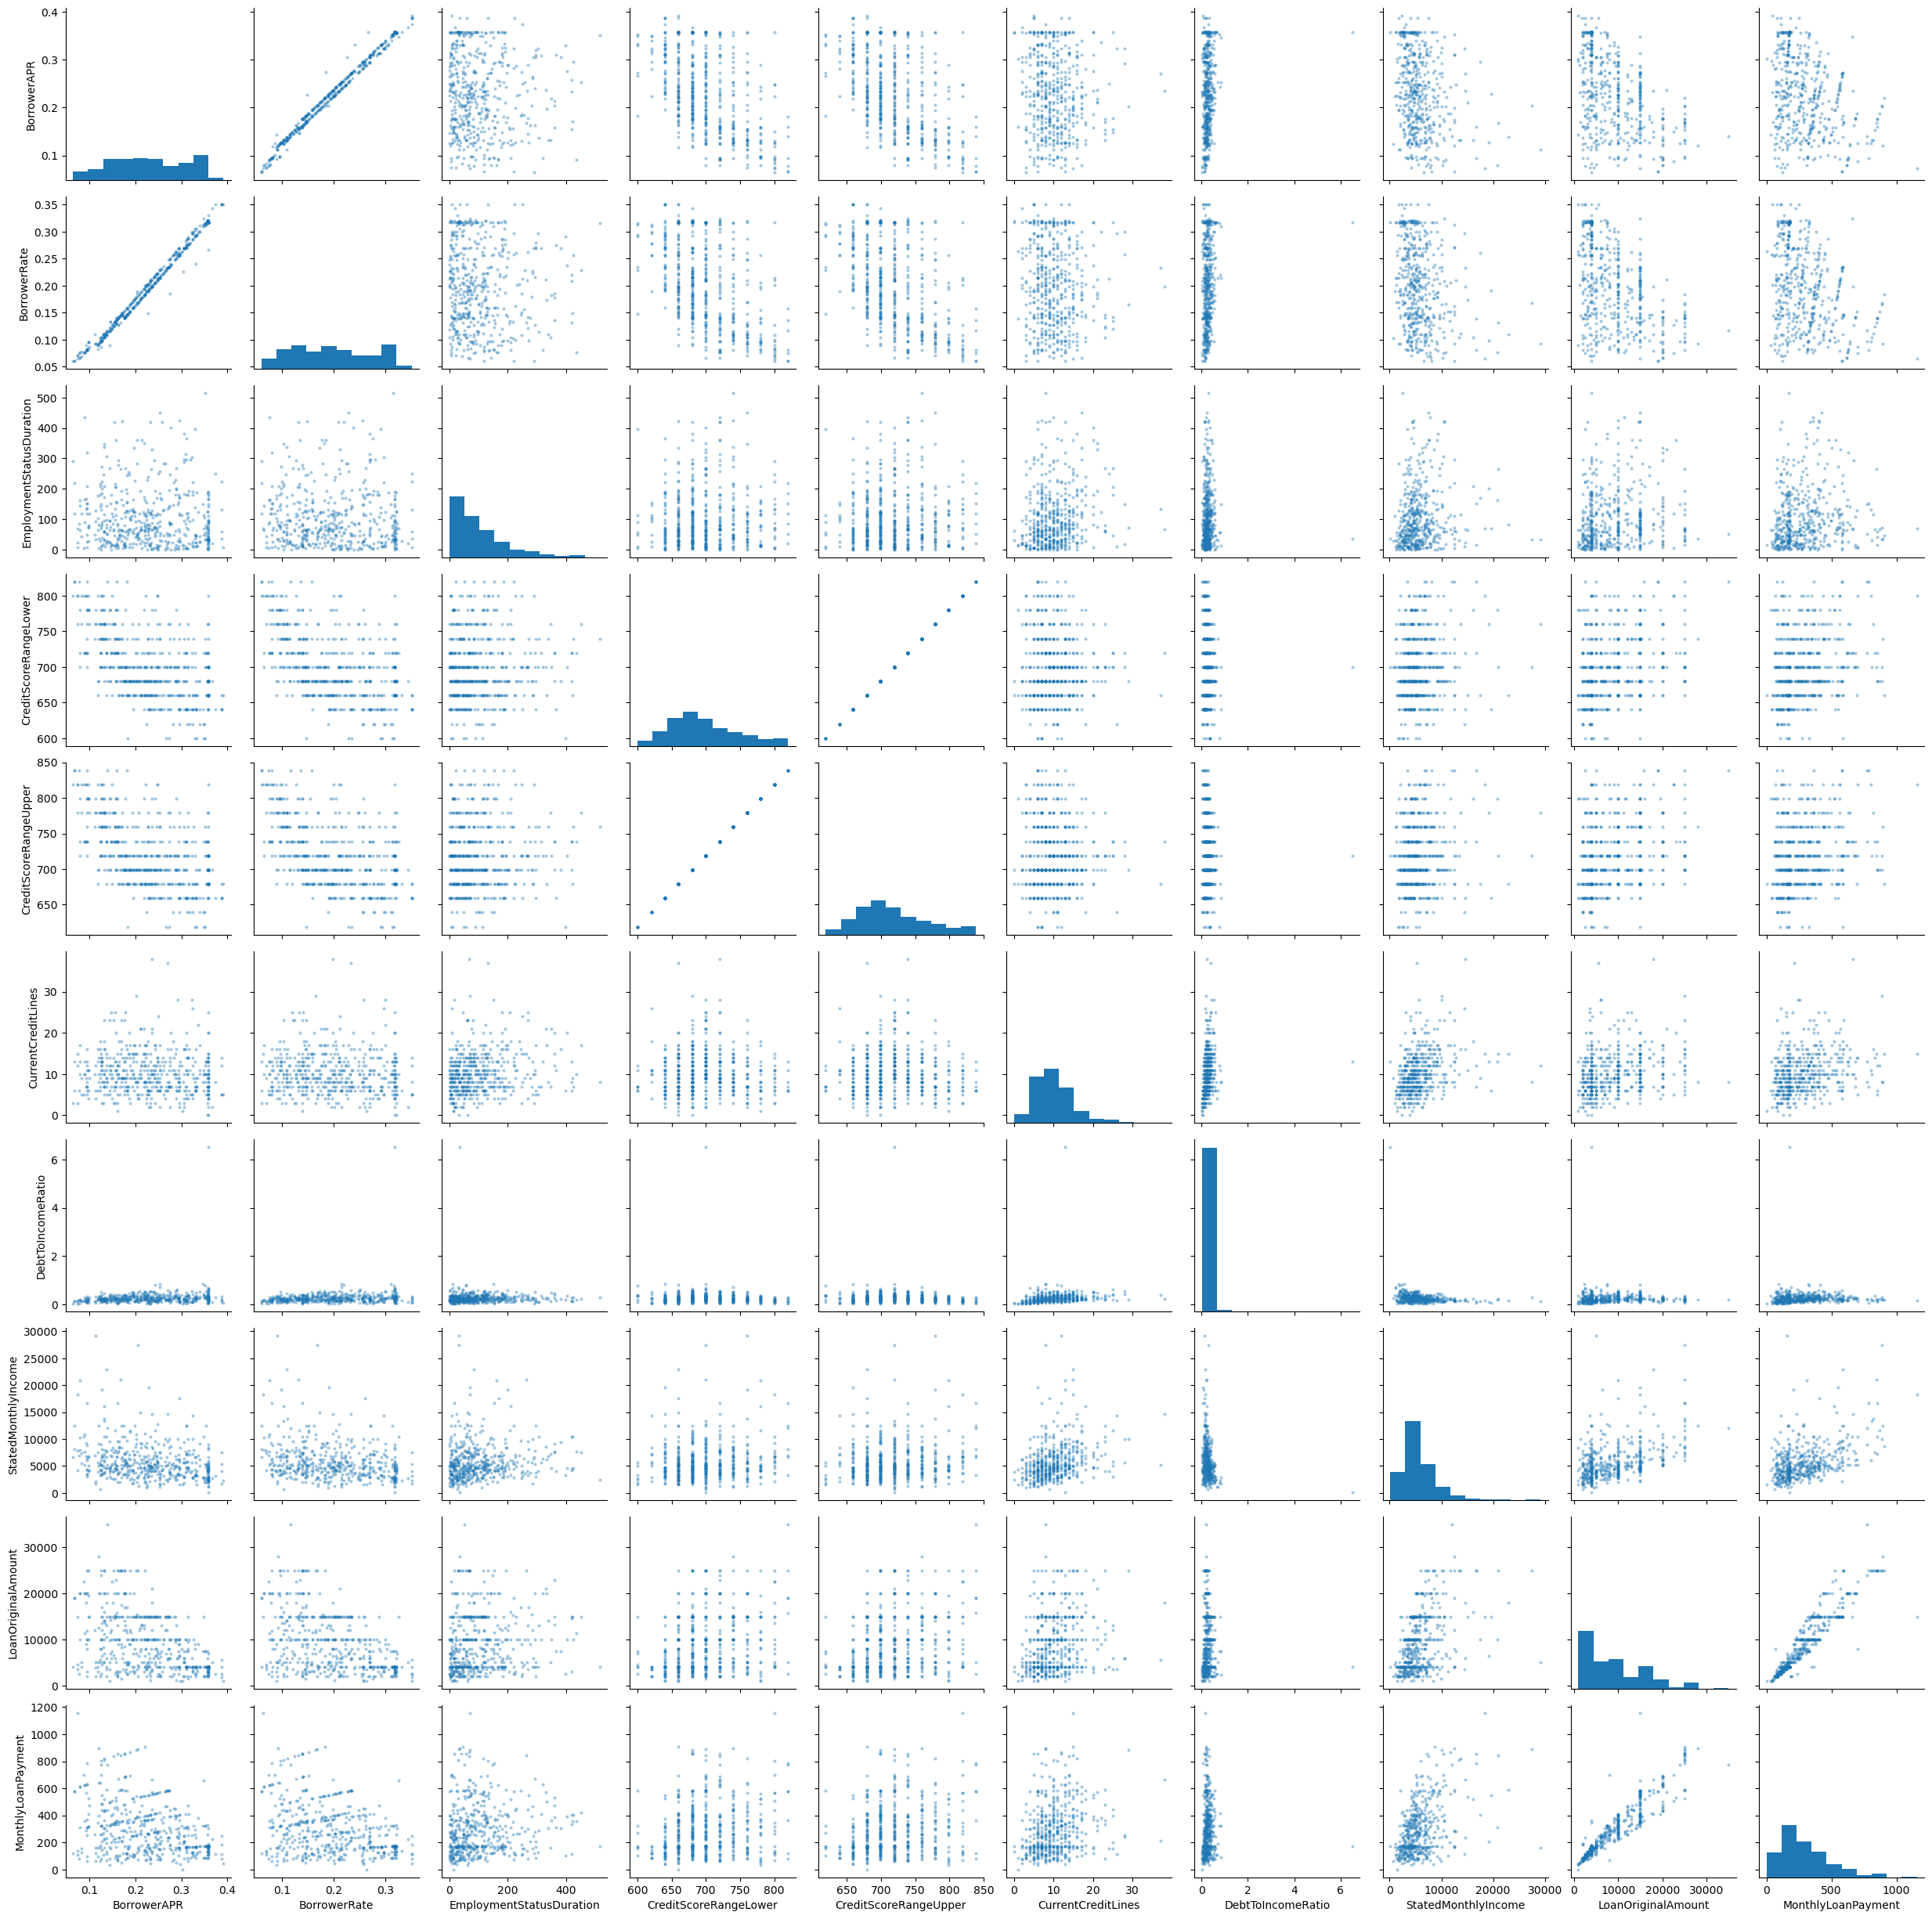

In [118]:
# Set random seed
np.random.seed(462)
# Selecte a random smaple of the dataset
sample = np.random.choice(df.shape[0], 500, replace = False)
# Subset the dataset using the data sample
df_subset = df.iloc[sample]

# Create a pairgrid of the subset dataframe
g = sns.PairGrid(data = df_subset, vars = numeric)
# Map the pairgrid
g.map_diag(plt.hist) #Create histogram on the diagonal
g.map_offdiag(plt.scatter, alpha = 0.3, s = 4)  #Create scatter plot on the off diagonal

# Display plot
plt.show()

The distribution indicates that most variables have no correlation, and the distribution is mostly concentrated in a single distribution space.

Facet grid of scatter plots between EmploymentStatus, LoanOriginalAmount and MonthlyLoanPayment

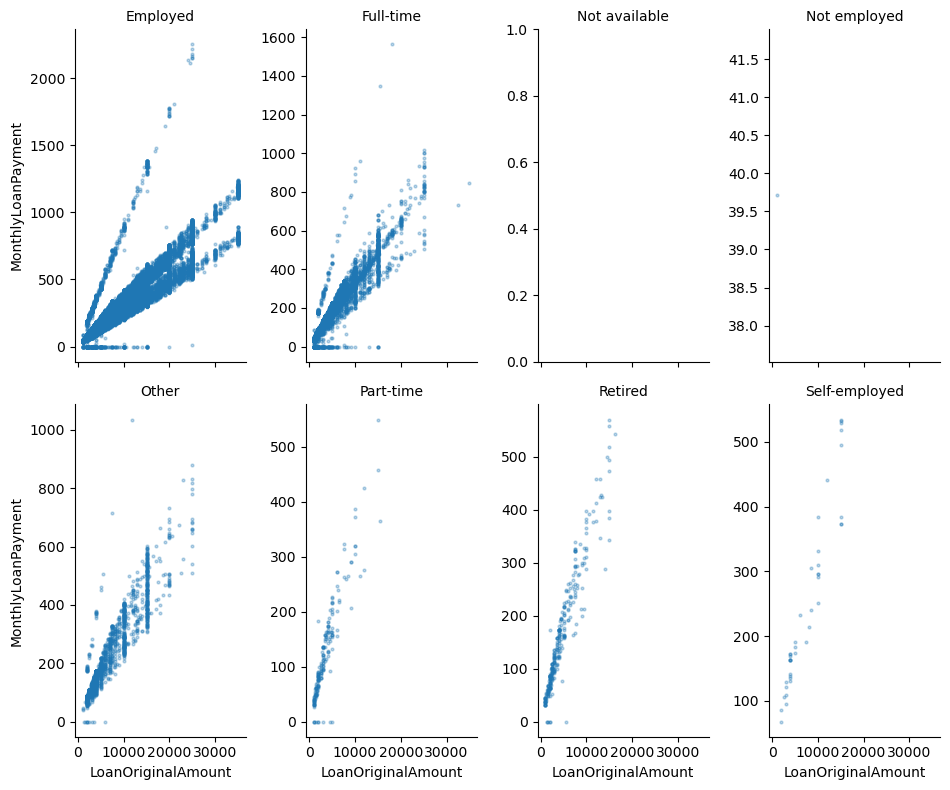

In [119]:
# Create FacetGrid
g = sns.FacetGrid(data = df, 
                  col = "EmploymentStatus", 
                  sharey=False,
                  height = 4, 
                  aspect = 0.6, 
                  col_wrap = 4)
# Map the scattere plot
g.map(plt.scatter, "LoanOriginalAmount", "MonthlyLoanPayment", alpha = 0.3, s = 4)

# Set each figure titel short
g.set_titles("{col_name}")

# display plot
plt.show()

Further investigation into the connection between MonthlyLoanPayment and LoanOriginalAmount across EmploymentStatus reveals a high correlation for employed borrowers. The majority of this group, representing the largest population, has loan amounts up to 25,000 and monthly payments of $1,000. Similarly, full-time borrowers and others make up the second and third largest populations. Furthermore, part-time, retired, and self-employed borrowers, who make up a small proportion of the borrower population, have a strong positive correlation. Notably, there is a subset of unemployed people who constitute a distinct population.

The distribution of MonthlyLoanPayment per Term over the year

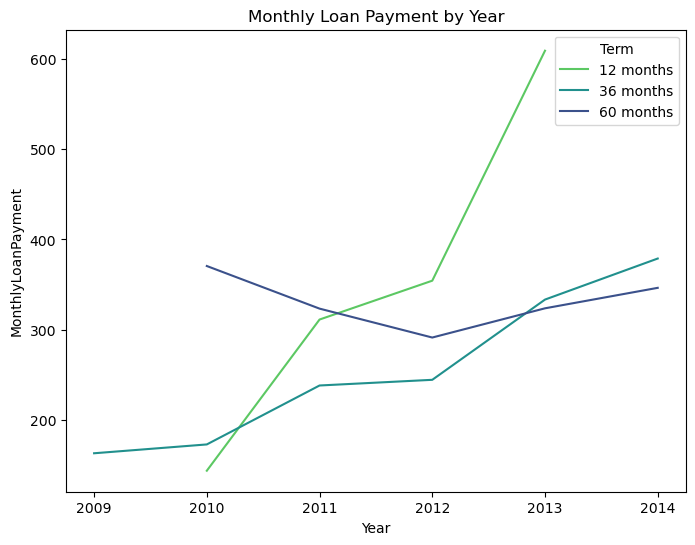

In [120]:
# Extract the year from LoanOriginationDate
df["Year"] = df["LoanOriginationDate"].dt.year

# Set figure size
plt.figure(figsize = (8, 6))
# Create line plot
sns.lineplot(x = "Year", 
             y = "MonthlyLoanPayment", 
             hue = "Term", 
             data = df,
            palette = "viridis_r",
            ci=None)
# Title the plot and add legend
plt.title("Monthly Loan Payment by Year")
plt.legend(title="Term", labels=["12 months", "36 months", "60 months"])

# Display plot
plt.show()

The chart shows the evolution of loan terms at businsse, demonstrating that the company initially offered only 36-month loan term before introducing 12-month and 60-month terms in 2010. Interestingly, there has been a significant and steady increase in  the monthly loan payment since the introduction of 12-month loan term, which has continued until 2013. Similarly, the 36-month loan term has seen consistent increases in loan payments from 2009 to the present. In comparison, the 60-month loan term experienced a 100 dollars decrease in monthly loan payments shortly after its introduction in 2012, but has since experienced a slow and steady rise, currently standing at around 350 dollars in monthly loan payments.

The relationship between IsBorrowerHomeowner and BorrowerAPR, StatedMonthlyIncome, LoanOriginalAmount, DebtToIncomeRatio respectively

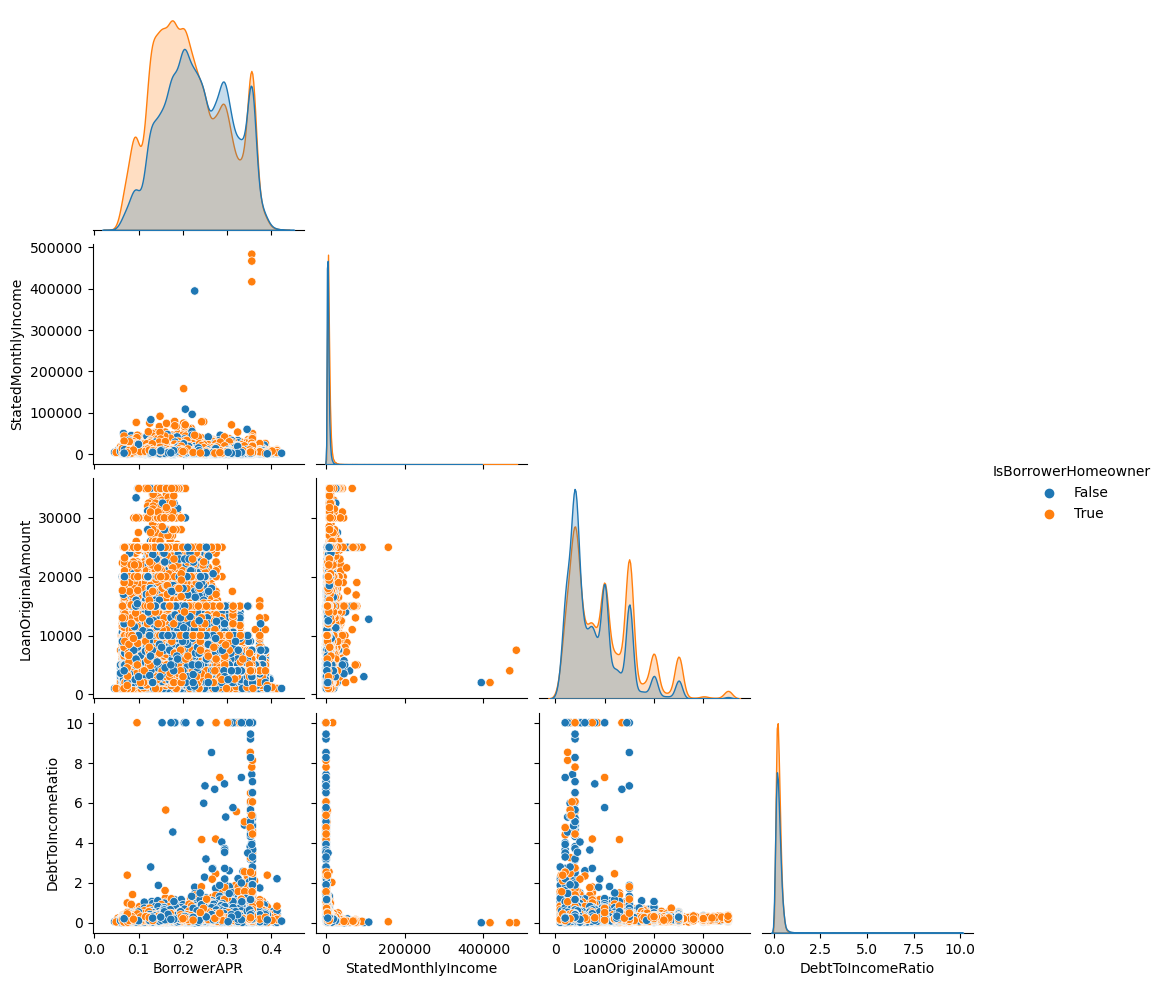

In [121]:
# Create a pairplot
sns.pairplot(data = df, 
             vars = [
                     "BorrowerAPR", 
                     "StatedMonthlyIncome", 
                     "LoanOriginalAmount", 
                     "DebtToIncomeRatio"
                    ], 
             hue = "IsBorrowerHomeowner", 
             diag_kind = "kde", 
             height = 2.5, 
             corner = True)
# Display plot
plt.show()

There is a clear indication that are this no correlation between a borrower been a home owner and his or her borrowing APR, stated monthly income, loan original amount and debt ro income ration.

Find the distribution relationship between ProsperRating and BorrowerAPR, StatedMonthlyIncome, LoanOriginalAmount, DebtToIncomeRatio respectively

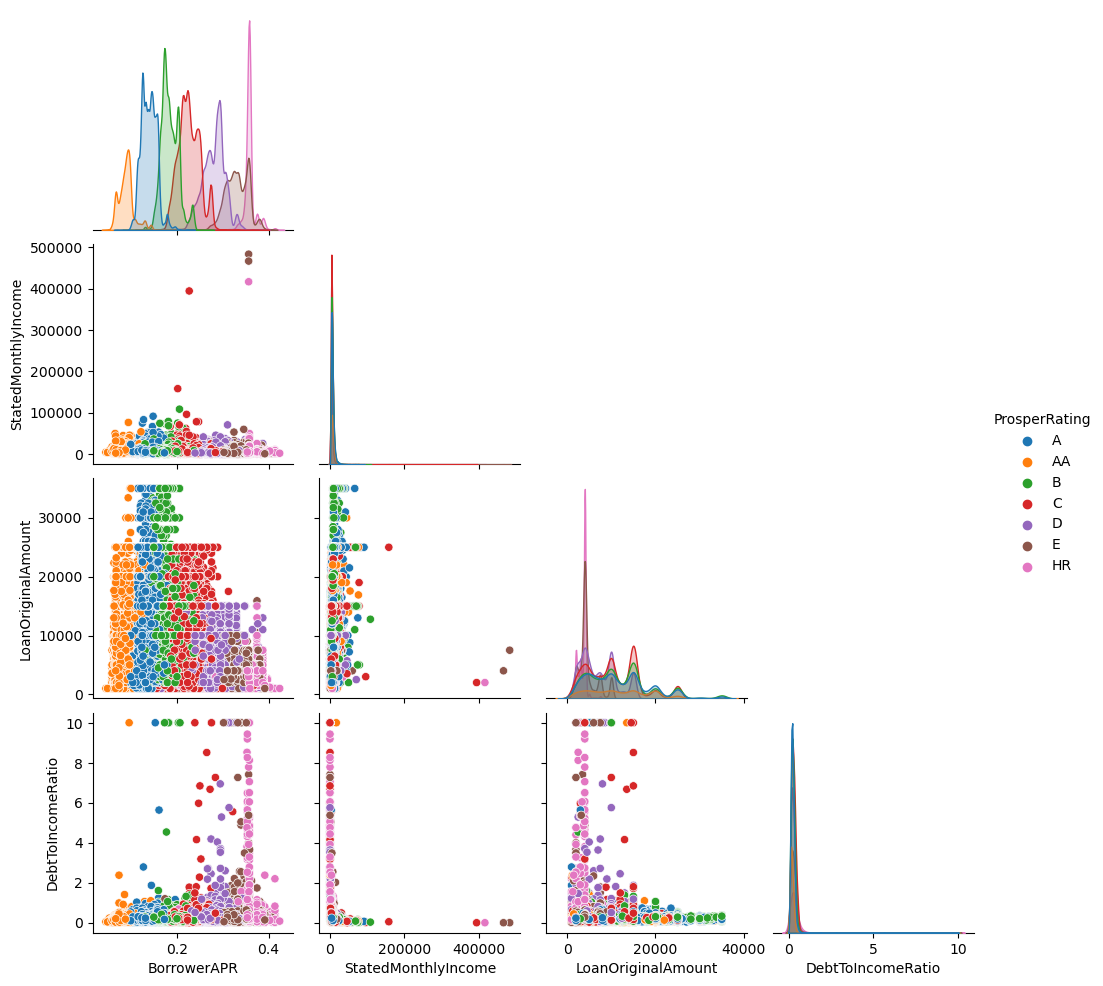

In [122]:
# Create a pairplot
sns.pairplot(data = df, 
             vars = [
                     "BorrowerAPR", 
                     "StatedMonthlyIncome", 
                     "LoanOriginalAmount", 
                     "DebtToIncomeRatio"
                    ], 
             hue = "ProsperRating", 
             diag_kind = "kde", 
             height = 2.5, 
             corner = True)
# Display plot
plt.show()

Based on the data, it appears that borrowers with an A rating have a low Borrower APR, and many have loans in excess of 30,000 dollars. Borrowers with AA ratings, on the other hand, typically have the lowest Borrower APR, and the maximum loan amount is limited to 25,000 dollars. Borrowers with a B rating have the third-lowest Borrower APR and the same maximum loan amount as A-rated borrowers, as well as the highest monthly income limit of the other ratings. Borrowers with a C credit rating have Borrower APRs ranging from 0.07 to 0.3, with a maximum loan amount of 25,000 dollars. Borrowers with a D rating, on the other hand, have a higher Borrower APR that exceeds 0.2. Borrowers with ratings E and HR have the highest Borrower APR and the lowest maximum monthly income of 10,000 dollars. HR rating borrowers also tend to have a high debt-to-income ratio compared to other ratings.

What is the distribution between EmploymentStatus and LoanStatus, and ProsperRating

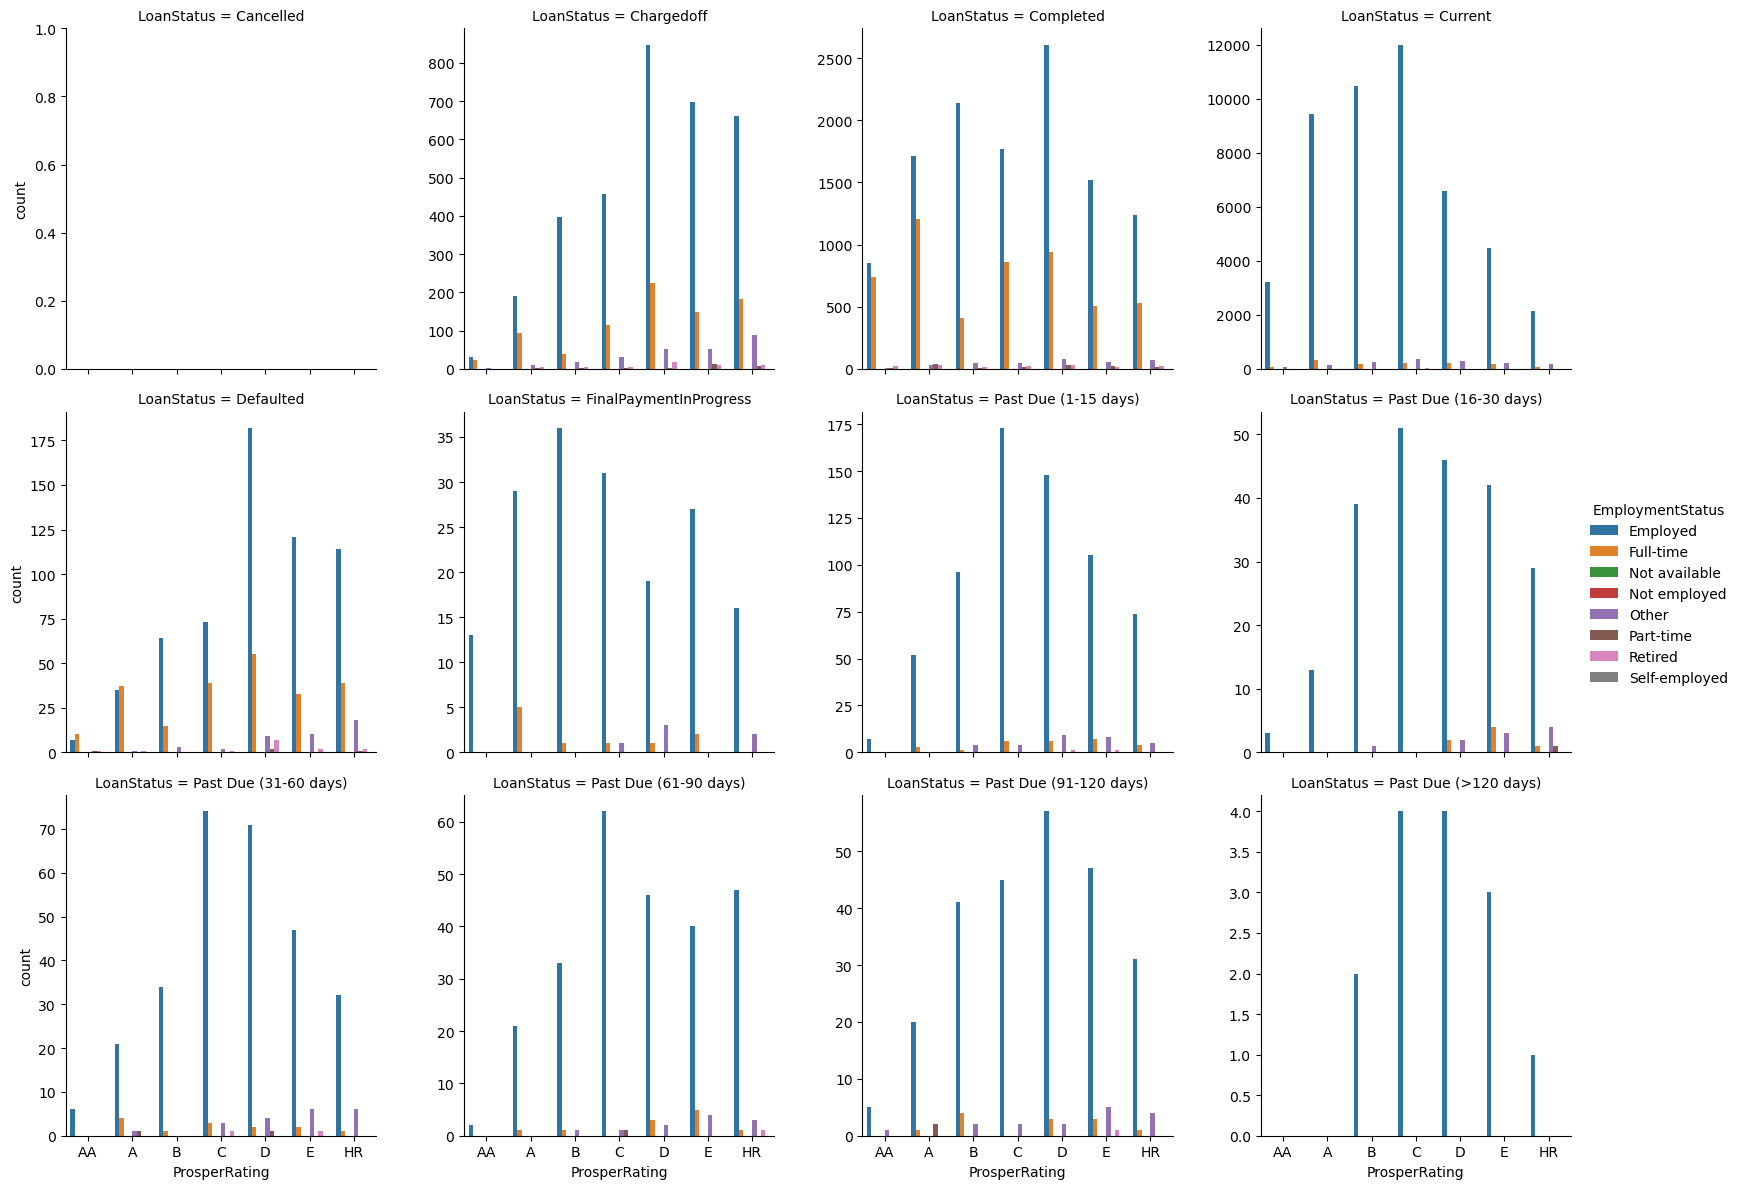

In [123]:
# Creat catplot
sns.catplot(data = df, 
            x = "ProsperRating", 
            hue = "EmploymentStatus", 
            col = "LoanStatus", 
            kind = "count", 
            order = credit_rating, 
            sharey = False,
            col_wrap = 4, 
            height = 4)
# Display the plot
plt.show()

The vast majority of borrowers who are currently servicing their loans, as well as those who have already completed their loan payments, are employed. Furthermore, a sizable proportion of those who have completed their loan payments work full-time.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> - There is a clear indication that are this no correlation between a borrower been a home owner and his or her borrowing APR, stated monthly income, loan original amount and debt ro income ration.

> - Except for a few negative correlations, the heat map shows that most numerical variables have low or insignificant correlations. MonthlyLoanPayment and LoanOriginalAmount have a high positive correlation of 0.92, while Borrowing APR and Borrowing Rate have a high positive correlation of 0.99. CreditScoreRange Lower and Upper also have a perfect correlation of one, indicating a high similarity between these variables. However, additional research is required to understand borrowing patterns and creditworthiness trends among borrowers.

### Were there any interesting or surprising interactions between features?

> Yes, there were interesting interactions between features across different EmploymentStatus categories, specifically between MonthlyLoanPayment and LoanOriginalAmount. The study found a high correlation between these variables for employed borrowers, who also make up the majority of borrowers with loan amounts up to 25,000 and monthly payments of $1,000. Part-time, retired, and self-employed borrowers, who make up a smaller proportion of the borrower population, have a strong positive correlation. Furthermore, a subset of unemployed borrowers was discovered to be a distinct population. These findings imply that employment status is an important factor in determining the correlation between loan amount and monthly payments, with different categories exhibiting varying degrees of correlation.

## Conclusions
It was discovered there has been a continueous increase from June 2019 to late 2012 in monthly loan payment over loan origination date till a decrease set in from late 2012 to early 2013. Following this drop, payments increased sharply from 25,000 to 180,000 between 2013 and 2014, followed by another drop.

The analysis revealed that the evolution of a company's loan terms, highlighting the addition of 12-month and 60-month terms in 2010, in addition to the initial 36-month term. Interestingly, there has been a significant and steady increase in monthly loan payments since the introduction of the 12-month term, which has continued until 2013. From 2009 to the present, the 36-month term has also seen consistent increases in loan payments. The 60-month term, on the other hand, initially saw a 100-dollar decrease in monthly loan payments shortly after its introduction in 2012, but has since seen a slow and steady rise, with current monthly loan payments hovering around 350 dollars.

Additionally, the ProsperRating and IsBorrowerHomeowner distribute a sizable proportion of borrowers rated C, with a relatively even split between those who own a home and those who do not. Borrowers with an A credit score are more common, with a higher percentage owning a home. Borrowers with an AA credit rating are relatively uncommon, and the majority own a home.

The analysis summarizes the Borrower APR and maximum loan amount across different Prosper ratings. Borrowers with an A rating generally have low Borrower APR and higher loan amounts while borrowers with AA ratings have the lowest APR and a maximum loan limit of 25,000 dollars. The Borrower APR for B and C rating borrowers ranges from 0.07 to 0.3, with a maximum loan limit of 25,000 dollars. However, D rating borrowers have higher Borrower APR compared to other ratings. E and HR ratings have the highest Borrower APR and lowest maximum monthly income, with HR borrowers having a high debt-to-income ratio.